In [1]:
from experts import Expert
import numpy as np
import gym

In [2]:
expert = Expert('LunarLander-v2')
data, rewards, splits = expert.generate_data(100)

In [3]:
np.mean(rewards), np.std(rewards)

(257.1354310740733, 82.39634668617515)

In [23]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [5]:
LR = LogisticRegression(
    penalty='none',
    max_iter=10000,
    multi_class='multinomial',
    fit_intercept=True
).fit(data[:,0:8], data[:,8])

In [6]:
rewards = []
env = gym.make('LunarLander-v2')
for i in range(100):
    
    observation = env.reset().reshape(1,-1)
    done = False
    rd = 0
    while not done:

        action = LR.predict(observation)
        observation, reward, done, _ = env.step(int(action[0]))
        observation = observation.reshape(1,-1)
        rd += int(reward)

    rewards.append(rd)

np.mean(rewards), np.std(rewards)

(208.86, 79.7107295161699)

In [7]:
expert = Expert('Pendulum-v0')
data, rewards, splits = expert.generate_data(100)
np.mean(rewards), np.std(rewards)

(-145.81508185203455, 89.19042899333441)

In [9]:
env = gym.make('Pendulum-v0')
env.reset()

array([-0.79865219, -0.60179289,  0.70951316])

In [26]:
LR = LinearRegression(
    #penalty='none',
    #max_iter=10000,
    #multi_class='multinomial',
    fit_intercept=True
).fit(data[:,0:3], data[:,3])

In [15]:
env.action_space.sample()

array([0.8723742], dtype=float32)

In [27]:
rewards = []

for i in range(100):
    
    observation = env.reset().reshape(1,-1)
    done = False
    rd = 0
    while not done:

        action = LR.predict(observation)
        #print(action)
        observation, reward, done, _ = env.step(action)
        observation = observation.reshape(1,-1)
        rd += int(reward)

    rewards.append(rd)

np.mean(rewards), np.std(rewards)

(-1198.98, 134.65763847624834)

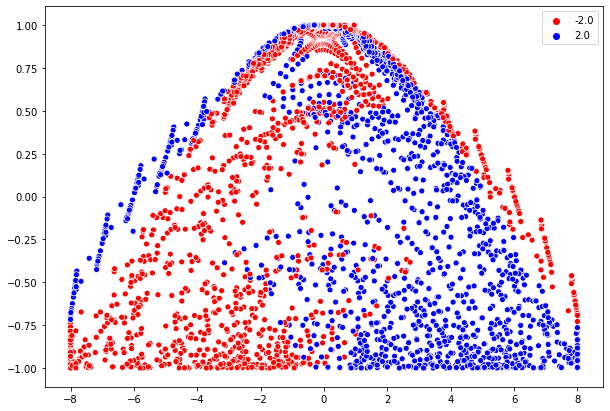

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.scatterplot(x=data[:,2], y=data[:,0], hue=data[:,3], palette=['red', 'blue'])